In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(color_codes=True)

# Data Collection and Setup

Read in the 911 calls data set from Philadelphia and preview the head of the file

In [3]:
calls_df = pd.read_csv('datasets/911.csv')
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Use the info() method to find out what sort of data and how many records are contained in this dataset

In [4]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# Analyzing the Data

1. What are the top 5 zipcodes for 911 calls?

In [5]:
calls_df["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

2. What are the top 5 townships (twp) for 911 calls? 

In [6]:
calls_df["twp"].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

3. How many unique title codes are in this dataset per the 'title' column?

In [7]:
calls_df['title'].nunique()

110

4. Create a new column titled 'Reason'. This value will contain the first valye (EMS, Fire, Traffic) from the title column

In [8]:
calls_df['Reason'] = calls_df['title'].apply(lambda x: x.split(':')[0])
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


5. What is the most common reason for a 911 call based on the Reason column

In [9]:
calls_df["Reason"].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# Visualizing the Data

1. Create a countplot in Seaborn of 911 calls by Reason

<AxesSubplot:xlabel='Reason', ylabel='count'>

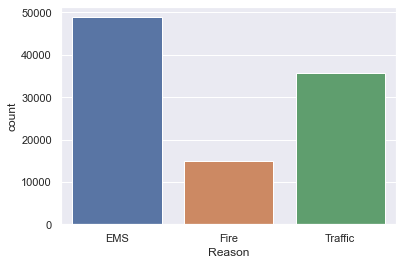

In [10]:
sns.countplot(x='Reason',data=calls_df)

2. In this step we will want to extract more information about the date for this dataset. We want to add a new column for Hour, Month, and Day of Week. To do this we can convert our current 'timeStamp' column from a string to a date object. From there we can extract specific, hour, month, and day properties from our date object

In [11]:
calls_df['timeStamp'] = pd.to_datetime(calls_df['timeStamp'])
calls_df['Hour'] = calls_df['timeStamp'].apply(lambda time: time.hour)
calls_df['Month'] = calls_df['timeStamp'].apply(lambda time: time.month)
calls_df['Day of Week'] = calls_df['timeStamp'].apply(lambda time: time.strftime('%A'))
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday


3. Use Seaborn to create a countplot of the Day of Week column with the hue based on the Reason column

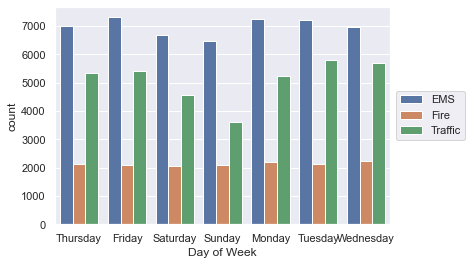

In [12]:
g = sns.countplot(x='Day of Week', hue="Reason",data=calls_df)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

4. Use Seaborn to create a countplot of the Month column with the hue based on the Reason column

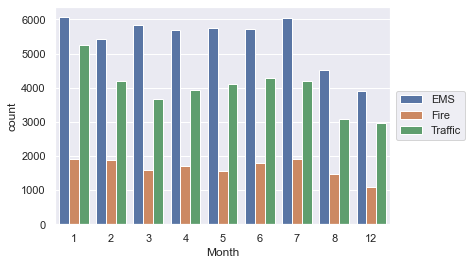

In [13]:
g = sns.countplot(x='Month', hue="Reason",data=calls_df)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))

5. Based on the above charts, we can see that months 9-11 are missing. Let's further examine our dataset to see if we can find any information based on these missing months

    Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. 

In [14]:
calls_by_month = calls_df.groupby('Month').count()
calls_by_month.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


6. Create a line plot indicating the number of calls per month

<AxesSubplot:xlabel='Month', ylabel='twp'>

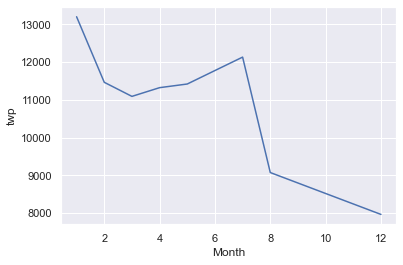

In [15]:
sns.lineplot(data=calls_by_month['twp'])

7. Use seaborn's lmplot() to create a linear fit on the number of calls per month. Note the reset_index() method needs to be used here

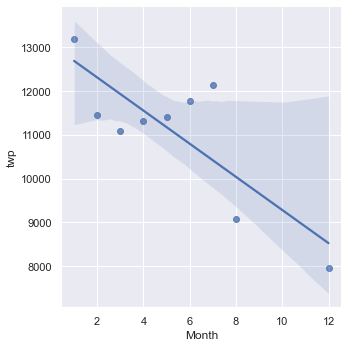

In [16]:
sns.lmplot(x='Month',y='twp', data=calls_by_month.reset_index())

8. Create a new column called 'Date' that contains the date from the timeStamp column. We can use the date() function to extract the date property from the timeStamp column

In [17]:
calls_df['Date'] = calls_df['timeStamp'].apply(lambda date_obj: date_obj.date())
calls_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thursday,2015-12-10


9. ** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [ ]:
calls_by_date = calls_df.groupby('Date').count()
plt.figure(figsize=(15,8))
sns.lineplot(data=calls_by_date['twp'])

10. Next we will, create 3 separate plots. Each of these calls will include the number of calls per Date by Reason Code: EMS, Fire Traffic. <br>
    Starting with EMS calls.

In [ ]:
# First we can query our initial data set to only get calls with a Reason of EMS
ems_calls = calls_df.query("Reason == 'EMS'")

# From that resulting dataframe, we can then group by the date to retrieve number of EMS calls by date
calls_by_date_ems = ems_calls.groupby('Date').count()

# Create our plot
plt.figure(figsize=(15,8))
sns.lineplot(data=calls_by_date_ems['twp']).set(title='EMS Calls By Month')


Plot calls per date for Fire related calls

In [ ]:
# First we can query our initial data set to only get calls with a Reason of Fire
fire_calls = calls_df.query("Reason == 'Fire'")

# From that resulting dataframe, we can then group by the date to retrieve number of Fire calls by date
calls_by_date_fire = fire_calls.groupby('Date').count()

# Create our plot
plt.figure(figsize=(15,8))
sns.lineplot(data=calls_by_date_fire['twp']).set(title='Fire Calls By Month')

Plot calls per date for Traffic related calls

In [ ]:
# First we can query our initial data set to only get calls with a Reason of Fire
traffic_calls = calls_df.query("Reason == 'Traffic'")

# From that resulting dataframe, we can then group by the date to retrieve number of Fire calls by date
calls_by_date_traffic = traffic_calls.groupby('Date').count()

# Create our plot
plt.figure(figsize=(15,8))
sns.lineplot(data=calls_by_date_traffic['twp']).set(title='Traffic Calls By Month')